In [1]:
# import modules
import requests as rq
import json
import numpy as np
import pandas as pd
import tables as tb
from pandas import HDFStore, DataFrame, read_hdf
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
hdf2 = read_hdf('store.h5', 'd1')
hdf2.tail(5)

,eur_to_dol,eur_to_yen,dol_to_eur,dol_to_yen,yen_to_eur,yen_to_dol
0,2.881,-34.949,-2.218,-331.675,0.778,3.453
0,2.881,-34.949,-2.218,-331.675,0.778,3.453
0,3.211,2.988,-1.898,-293.797,1.093,3.778
0,2.881,-34.949,-2.218,-331.675,0.778,3.453
0,2.881,-34.949,-2.218,-331.675,0.778,3.453


In [5]:
hdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 0
Data columns (total 6 columns):
eur_to_dol    69 non-null float64
eur_to_yen    69 non-null float64
dol_to_eur    69 non-null float64
dol_to_yen    69 non-null float64
yen_to_eur    69 non-null float64
yen_to_dol    69 non-null float64
dtypes: float64(6)
memory usage: 3.8 KB


In [7]:
hdf2.apply(max, axis = 0)

eur_to_dol      4.818
eur_to_yen    183.882
dol_to_eur     -0.395
dol_to_yen   -113.730
yen_to_eur      2.603
yen_to_dol      5.386
dtype: float64

In [8]:
hdf2.apply(min, axis = 0)

eur_to_dol      2.619
eur_to_yen    -63.485
dol_to_eur     -2.447
dol_to_yen   -358.882
yen_to_eur      0.540
yen_to_dol      3.193
dtype: float64

In [9]:
hdf3 = hdf2.reset_index(drop=True)
hdf3

,eur_to_dol,eur_to_yen,dol_to_eur,dol_to_yen,yen_to_eur,yen_to_dol
0,2.809,-41.995,-2.276,-338.520,0.711,3.373
1,2.809,-41.995,-2.276,-338.520,0.711,3.373
2,2.809,-41.995,-2.276,-338.520,0.711,3.373
3,2.619,-63.485,-2.447,-358.882,0.540,3.193
4,2.619,-63.485,-2.447,-358.882,0.540,3.193
5,2.619,-63.485,-2.447,-358.882,0.540,3.193
6,2.619,-63.485,-2.447,-358.882,0.540,3.193
7,3.391,22.904,-1.738,-273.832,1.257,3.961
8,3.024,-18.314,-2.081,-315.410,0.911,3.589
9,3.391,22.904,-1.738,-273.832,1.257,3.961


Populating the interactive namespace from numpy and matplotlib


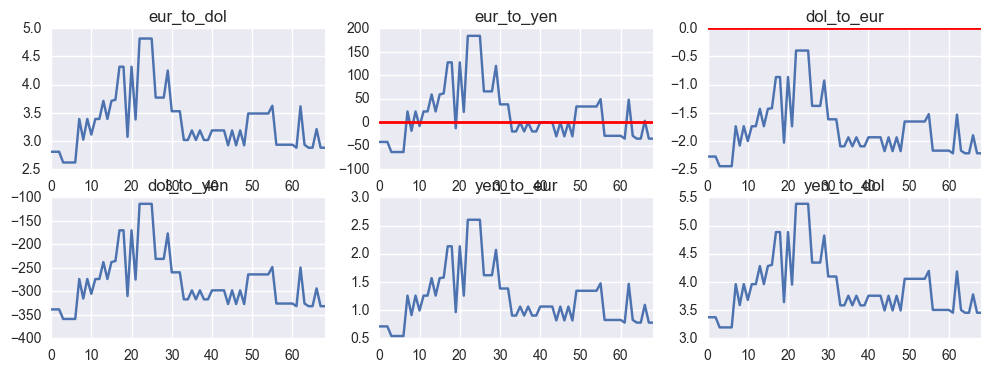

In [10]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 4)

plt.subplot(231)
hdf3['eur_to_dol'].plot()
plt.title('eur_to_dol')
plt.subplot(232)
hdf3['eur_to_yen'].plot()
plt.title('eur_to_yen')
plt.axhline(y=0, linewidth=2, color = 'r')
plt.subplot(233)
hdf3['dol_to_eur'].plot()
plt.title('dol_to_eur')
plt.axhline(y=0, linewidth=2, color = 'r')
plt.subplot(234)
hdf3['dol_to_yen'].plot()
plt.title('dol_to_yen')
plt.subplot(235)
hdf3['yen_to_eur'].plot()
plt.title('yen_to_eur')
plt.subplot(236)
hdf3['yen_to_dol'].plot()
plt.title('yen_to_dol')

**¿Es una estrategia viable para obtener beneficio, teniendo en cuenta que no hemos contado con los costes de transacción y el tiempo aproximado en hacer las operaciones?**

*Antes de responder debemos tener en cuenta que los datos han sido extraídos el lunes 20 de febrero de 2017 entre la franja horaria de 14.20 a 15.30. Sería más útil tener la evolución de los pares de monedas a lo largo de un día, por ejemplo. Para comprender mejor el significado de las variables explico brevemente la nomenclatura elegida con un ejemplo:*

- *eur_to_dol = 1 bitcoin vendido en EUR, EUR cambiados a USD, se recompra 1 bitcoin y la gráfica muestra la diferencia (pérdida o ganancia) obtenida en esa última transacción.*

*En una primera vista vía subplot, vemos como las 6 muestras de pares recrean gráficas prácticamente idénticas en cuanto a las fluctuaciones, de no ser por la escala*. 

*Veamos como se comporta cada una de ellas a través de un boxplot.*

C:\Users\Alberto\Anaconda2\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


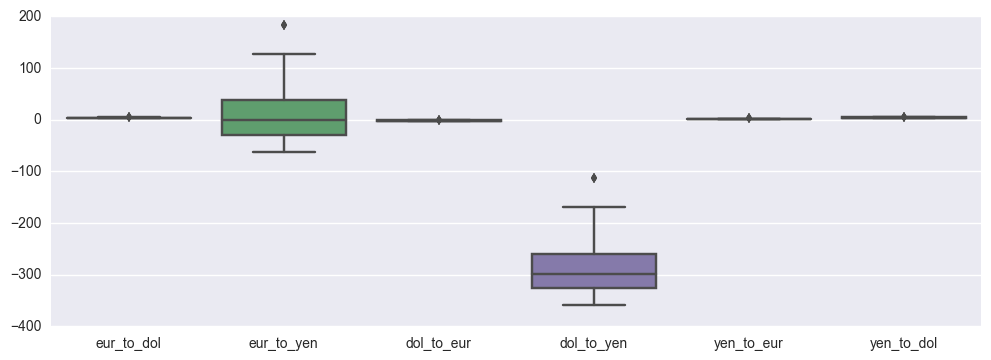

In [11]:
sns.boxplot(hdf3)

*Aquí se aprecia como los USD (cajas 1 y 6) y los EUR (cajas 3 y 5) son muestras mucho más robustas (monedas más estables en la compraventa de bitcoins) mientras que la compraventa de bitcoins en la divisa JPY oscila en mucha mayor medida.*

*Veamos ahora nuevamente las gráficas, esta vez separadas en dos grupos (debido a la escala o cambio entre pares de monedas):*
- *USD y EUR* 
- *JPY*

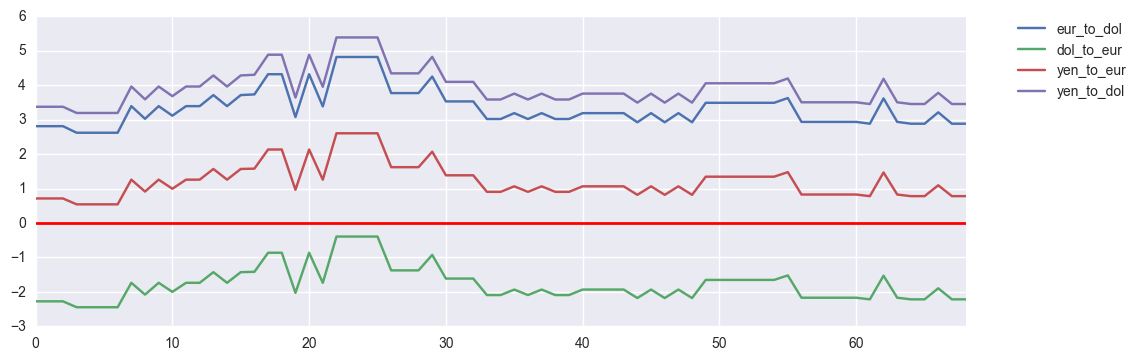

In [12]:
hdf3['eur_to_dol'].plot()
hdf3['dol_to_eur'].plot()
hdf3['yen_to_eur'].plot()
hdf3['yen_to_dol'].plot()
plt.axhline(y=0, linewidth=2, color = 'r')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

*Atendiendo a las condiciones vinculadas a la obtención de las muestras vemos que la compra de bitcoins en USD(dol) siempre genera rentabilidad (entre casi 3 y 5.5 USD por bitcoin recomprado) mientras que la recompra de bitcoins en EUR sólo genera beneficio si la venta previa del bitcoin se realizó en JPY (entre 0.5 y casi 3 EUR) y pérdidas si fue en USD.*

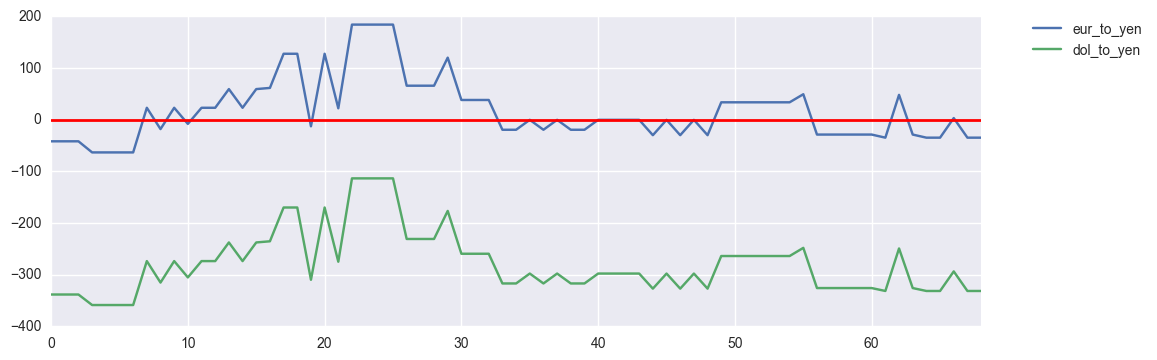

In [13]:
hdf3['eur_to_yen'].plot()
hdf3['dol_to_yen'].plot()
plt.axhline(y=0, linewidth=2, color = 'r')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

*Para el caso de recompra de bitcoins en JPY, existen pérdidas (entre 100 y unos 350 JPY por bitcoin comprado) siempre y cuando el bitcoin original se vendiera en USD y éstos se cambiaran a JPY.*

*Si el bitcoin original fue vendido en EUR y éstos cambiados a JPY para recomprar, aparecen por primera vez, en los pares de monedas, oscilaciones entre el beneficio y las pérdidas, si bien prevalece el primero de ellos para eur_to_yen.*

In [14]:
hdf3['eur_to_yen'].sum()

1205.4750000000013

*Ciñiéndonos a los datos del estudio y desconociendo los costes de transacción vemos que las únicas operaciones seguras (en caso de mantenerse a lo largo del tiempo) son, por orden de beneficio:*
- *La recompra de un bitcoin en USD que previamente fue vendido en JPY*
- *La recompra de un bitcoin en USD que previamente se vendió en EUR*
- *La recompra de un bitcoin en EUR que anteriormente se vendió en JPY*